<a href="https://colab.research.google.com/github/sunaina1701/Thyroid-EDA-/blob/main/Thyroid_cancer_risk_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#load the data
data = pd.read_csv('thyroid_cancer_risk_data.csv')

In [ ]:
#view the data
data.head()

Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
0           1   66    Male   Russia  Caucasian             No   
1           2   29    Male  Germany   Hispanic             No   
2           3   86    Male  Nigeria  Caucasian             No   
3           4   75  Female    India      Asian             No   
4           5   35  Female  Germany    African            Yes   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No       No       1.83   
2                 No                No      No      No       No       6.26   
3                 No                No      No      No       No       4.10   
4                Yes                No      No      No       No       9.10   

   T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk Diagnosis  
0      1.67      6.16         1.08                 Low    Benign  
1      1.73     10.54         4.05                 Low    Benign  
2      2.59     10.57         4.61                 Low    Benign  
3      2.62     11.04         2.46              Medium    Benign  
4      2.11     10.71         2.11                High    Benign

In [ ]:
#summary statistics
data.describe()

Patient_ID            Age      TSH_Level       T3_Level  \
count  212691.00000  212691.000000  212691.000000  212691.000000   
mean   106346.00000      51.918497       5.045102       2.001727   
std     61398.74739      21.632815       2.860264       0.866248   
min         1.00000      15.000000       0.100000       0.500000   
25%     53173.50000      33.000000       2.570000       1.250000   
50%    106346.00000      52.000000       5.040000       2.000000   
75%    159518.50000      71.000000       7.520000       2.750000   
max    212691.00000      89.000000      10.000000       3.500000   

            T4_Level    Nodule_Size  
count  212691.000000  212691.000000  
mean        8.246204       2.503403  
std         2.164188       1.444631  
min         4.500000       0.000000  
25%         6.370000       1.250000  
50%         8.240000       2.510000  
75%        10.120000       3.760000  
max        12.000000       5.000000

In [ ]:
#check for missing values
data.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [ ]:
#drop the missing data
data.dropna(inplace=True)

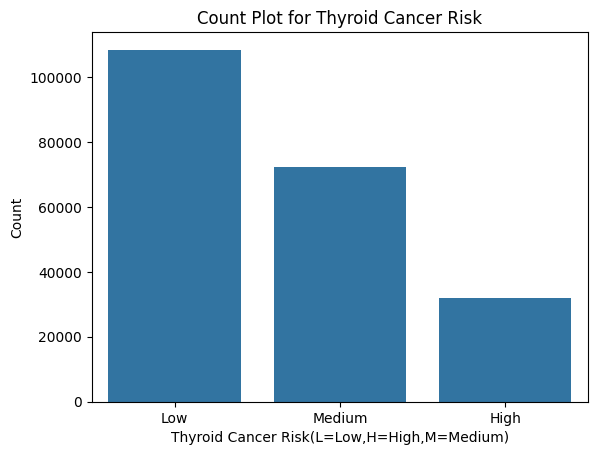

In [ ]:
#count plot for categorical feature
sns.countplot(x='Thyroid_Cancer_Risk', data=data)
plt.title('Count Plot for Thyroid Cancer Risk')
plt.xlabel('Thyroid Cancer Risk(L=Low,H=High,M=Medium)')
plt.ylabel('Count')
plt.show()

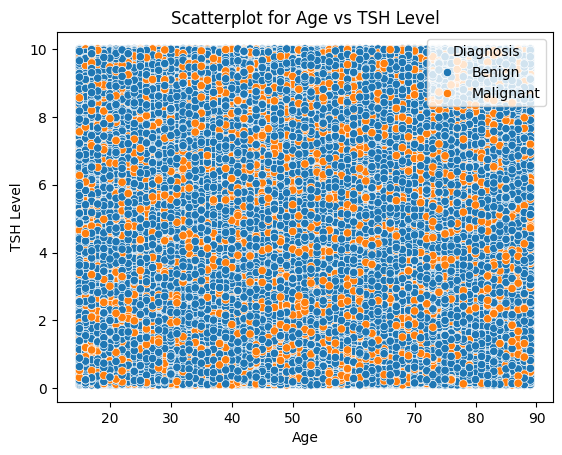

In [ ]:
#scatterplot for two numerical features
sns.scatterplot(x='Age', y='TSH_Level', data=data, hue='Diagnosis')
plt.title('Scatterplot for Age vs TSH Level')
plt.xlabel('Age')
plt.ylabel('TSH Level')
plt.show()


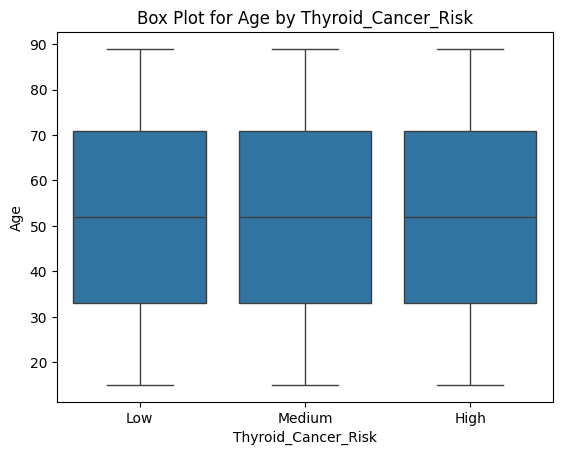

In [ ]:
# Box plot to compare distributions
sns.boxplot(x='Thyroid_Cancer_Risk', y='Age', data=data)
plt.title('Box Plot for Age by Thyroid_Cancer_Risk')
plt.xlabel('Thyroid_Cancer_Risk')
plt.ylabel('Age')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(data, x='Age', y='TSH_Level', color='Diagnosis')
fig.show()

In [ ]:
fig = px.box(data, x='Diagnosis', y='Age', color='Diagnosis')
fig.show()

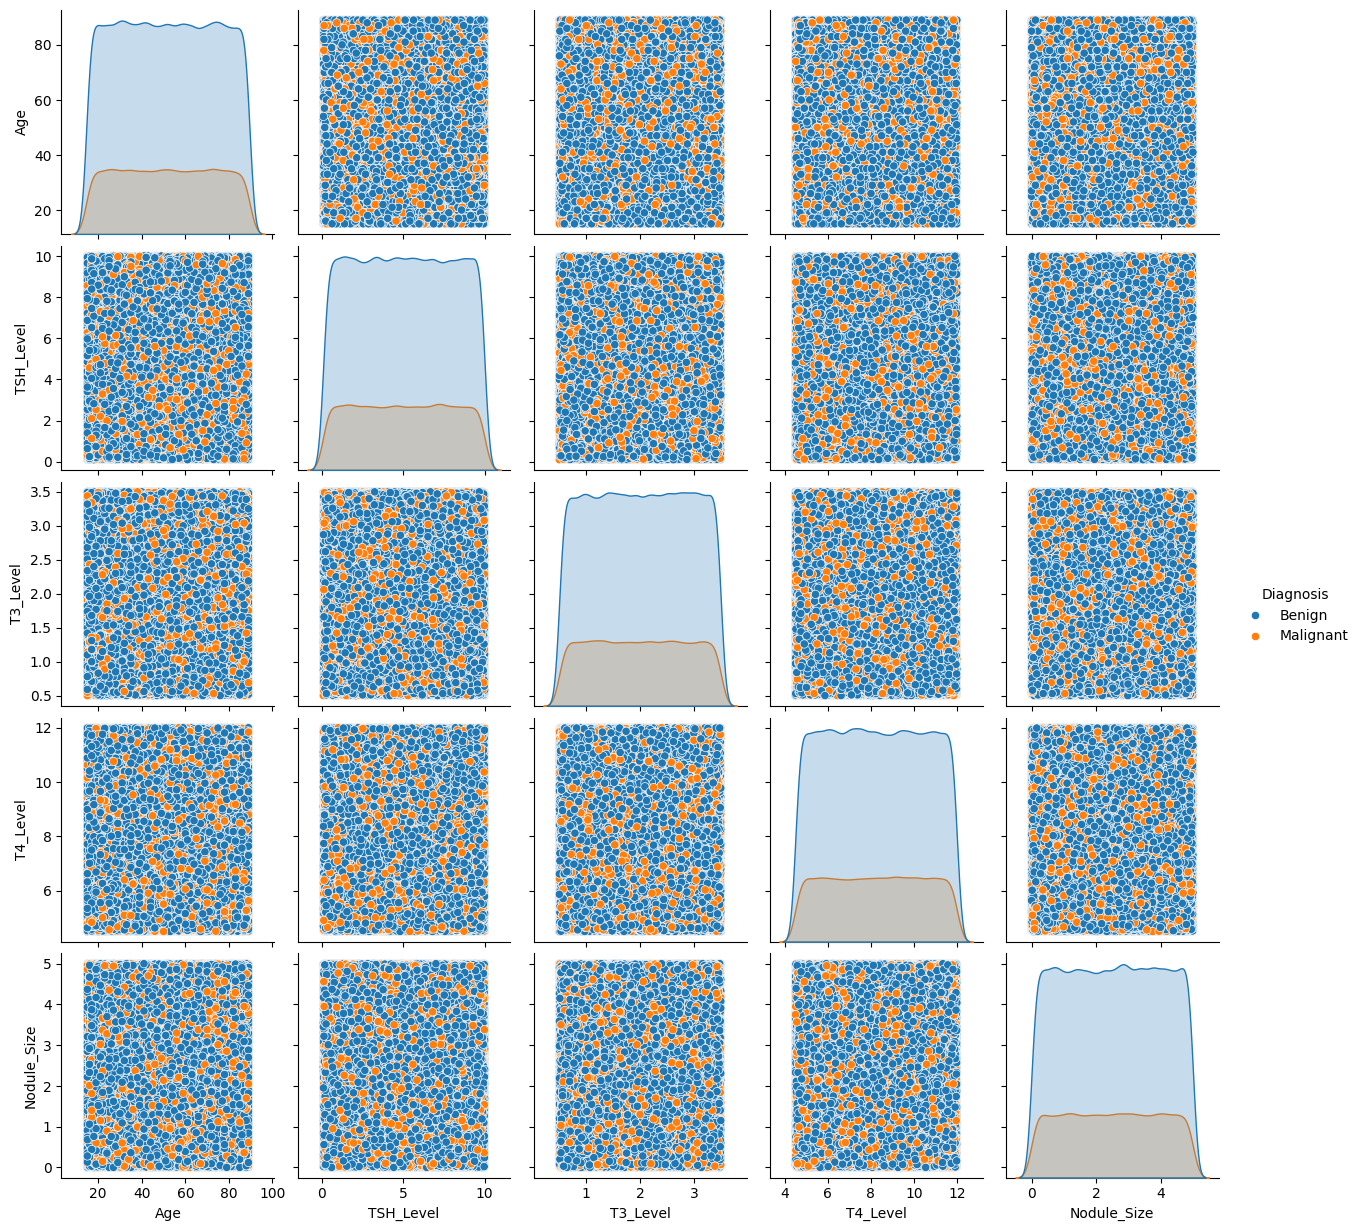

In [ ]:
# Pair plot for a subset of features
features = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
sns.pairplot(data, vars=features, hue='Diagnosis')
plt.show()

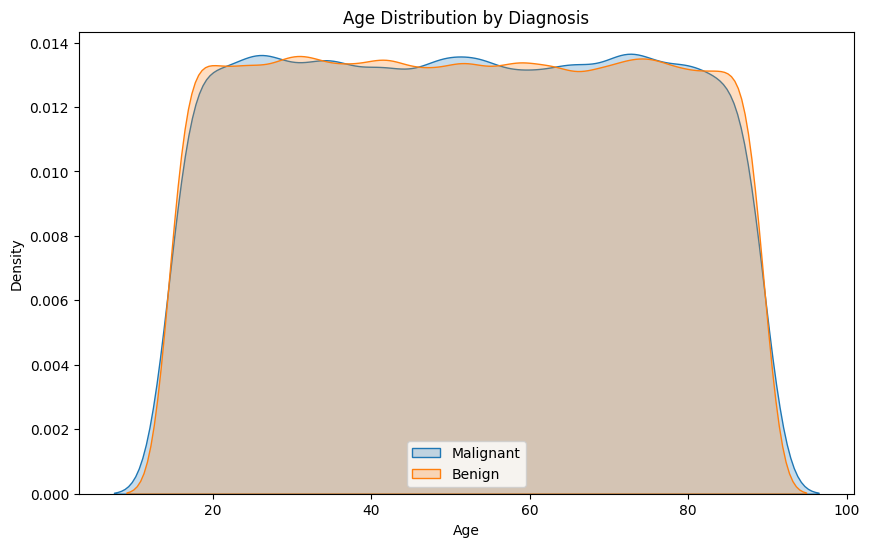

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Diagnosis'] == 'Malignant']['Age'], label='Malignant', shade=True)
sns.kdeplot(data[data['Diagnosis'] == 'Benign']['Age'], label='Benign', shade=True)
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

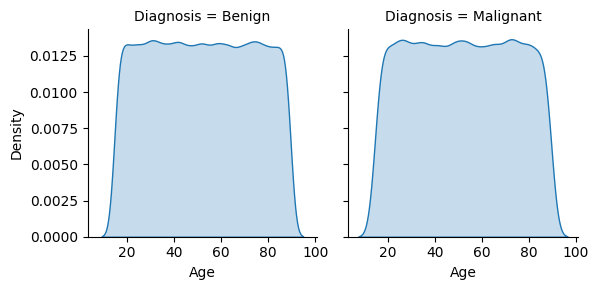

In [ ]:
g = sns.FacetGrid(data, col="Diagnosis", margin_titles=True)
g.map(sns.kdeplot, "Age", shade=True)
plt.show()

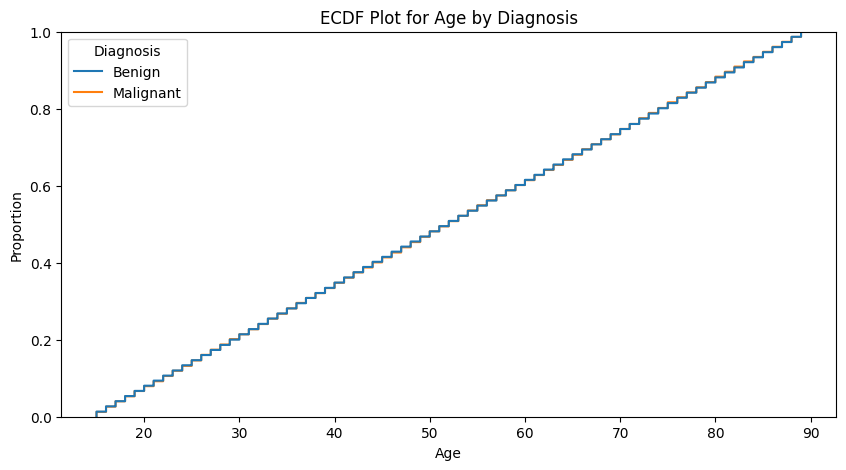

In [ ]:
plt.figure(figsize=(10, 5))
sns.ecdfplot(data=data, x='Age', hue='Diagnosis', stat='proportion')
plt.title('ECDF Plot for Age by Diagnosis')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.show()

In [ ]:
fig = px.histogram(data, x='Age', color='Diagnosis', barmode='overlay', nbins=20)
fig.show()